# Genetics: From Mendel to Modern Genomics

## Comprehensive Introduction to Genetic Principles

**Level**: Introductory | **Language**: Julia 1.9

### Historical Foundation

Genetics began in 1866 when Gregor Mendel published his work on pea plants, establishing the fundamental laws of inheritance. The field transformed with Watson and Crick's DNA structure discovery in 1953, leading to today's genomic revolution.

### Learning Objectives

- Understand DNA structure and the central dogma
- Apply Mendel's laws through computational simulations
- Analyze real genetic data using Julia
- Explore modern applications in medicine and biotechnology



In [1]:
# Load required packages
using Random, Statistics, Plots, StatsBase
using LinearAlgebra, DataFrames

# Set random seed for reproducibility
Random.seed!(42)

println(" Julia Genetics Analysis Environment Ready")
println("Version: ", VERSION)

[ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80] (cache misses: incompatible header (4), target mismatch (2))


[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a] (cache misses: wrong dep version loaded (2), incompatible header (4), target mismatch (2))


 Julia Genetics Analysis Environment Ready


Version: 1.11.6


## DNA \- The Molecule of Life

### Discovery and Structure

Rosalind Franklin's X-ray crystallography (Photo 51, 1952) revealed DNA's helical structure, enabling Watson and Crick's model. The double helix consists of:

- **Sugar-phosphate backbone**: Provides structural support
- **Nitrogenous bases**: A, T, G, C form the genetic code
- **Antiparallel strands**: 5' to 3' directionality



In [2]:
# DNA base pairing rules
const BASE_PAIRS = Dict('A' => 'T', 'T' => 'A', 
                       'G' => 'C', 'C' => 'G')

# Generate complementary strand
function complement_strand(dna::String)
    return join([BASE_PAIRS[base] for base in uppercase(dna)])
end

# Example
template = "ATCGATCG"
comp = complement_strand(template)
println("Template:    5'-$template-3'")
println("Complement:  3'-$comp-5'")

Template:    5'-ATCGATCG-3'


Complement:  3'-TAGCTAGC-5'


### Chargaff's Rules (1950)

Erwin Chargaff discovered that DNA composition follows specific patterns:
- %A = %T and %G = %C (base pairing)
- %GC content varies by species (thermal stability)

In [3]:
# Analyze DNA composition
function analyze_dna(sequence::String)
    seq = uppercase(sequence)
    bases = Dict(b => count(==(b), seq) for b in "ATGC")
    total = length(seq)
    
    gc_content = 100.0 * (bases['G'] + bases['C']) / total
    
    println("Base Composition:")
    for b in "ATGC"
        pct = round(100 * bases[b] / total, digits=1)
        println("  $b: $(bases[b]) ($pct%)")
    end
    println("\nGC Content: $(round(gc_content, digits=1))%")
    
    # Verify Chargaff's rules
    println("\nChargaff's Rules:")
    println("  A/T ratio: $(round(bases['A']/bases['T'], digits=2))")
    println("  G/C ratio: $(round(bases['G']/bases['C'], digits=2))")
end

# Human beta-globin gene fragment
hbb_fragment = "ATGGTGCACCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAGGTG"
analyze_dna(hbb_fragment)

Base Composition:


  A: 10 (17.5%)
  T: 13 (22.8%)
  G: 20 (35.1%)
  C: 14 (24.6%)

GC Content: 59.6%

Chargaff's Rules:
  A/T ratio: 0.77
  G/C ratio: 1.43


## Central Dogma of Molecular Biology

Francis Crick formulated the central dogma in 1958:

$$\text{DNA} \xrightarrow{\text{Transcription}} \text{RNA} \xrightarrow{\text{Translation}} \text{Protein}$$



In [4]:
# Transcription: DNA to RNA
function transcribe(dna::String)
    # RNA uses U instead of T
    return replace(uppercase(dna), 'T' => 'U')
end

# Genetic code (codon table)
const CODON_TABLE = Dict(
    "UUU"=>"F", "UUC"=>"F", "UUA"=>"L", "UUG"=>"L",
    "UCU"=>"S", "UCC"=>"S", "UCA"=>"S", "UCG"=>"S",
    "UAU"=>"Y", "UAC"=>"Y", "UAA"=>"*", "UAG"=>"*",
    "UGU"=>"C", "UGC"=>"C", "UGA"=>"*", "UGG"=>"W",
    "AUG"=>"M"  # Start codon
    # ... simplified for brevity
)

Dict{String, String} with 17 entries:
  "UAG" => "*"
  "UGC" => "C"
  "UUG" => "L"
  "UAU" => "Y"
  "UGA" => "*"
  "UGG" => "W"
  "UUU" => "F"
  "UUA" => "L"
  "UUC" => "F"
  "UCC" => "S"
  "UCU" => "S"
  "UCA" => "S"
  "UGU" => "C"
  "UCG" => "S"
  "AUG" => "M"
  "UAC" => "Y"
  "UAA" => "*"

In [5]:
# Translation: RNA to Protein
function translate(rna::String)
    protein = Char[]
    
    for i in 1:3:length(rna)-2
        codon = rna[i:i+2]
        aa = get(CODON_TABLE, codon, '?')
        
        if aa == '*'  # Stop codon
            break
        else
            push!(protein, aa[1])
        end
    end
    
    return String(protein)
end

# Example: insulin gene fragment
dna_seq = "ATGGCCCTGTGGATGCGC"
rna_seq = transcribe(dna_seq)
protein_seq = translate(rna_seq)

println("DNA:     $dna_seq")
println("RNA:     $rna_seq")
println("Protein: $protein_seq")

DNA:     ATGGCCCTGTGGATGCGC
RNA:     AUGGCCCUGUGGAUGCGC
Protein: M??WM?


## Mendelian Genetics

### Mendel's Experiments (1856-1863)

Gregor Mendel studied 7 traits in pea plants, discovering:

- **Law of Segregation**: Alleles separate during gamete formation
- **Law of Independent Assortment**: Different traits inherited independently
- **Dominance**: Some alleles mask others



In [6]:
# Simulate Mendelian inheritance
struct Genotype
    allele1::Char
    allele2::Char
end

# Determine phenotype (A = dominant)
phenotype(g::Genotype) = ('A' in [g.allele1, g.allele2]) ? "Dominant" : "Recessive"

# Gamete formation (meiosis)
function make_gamete(parent::Genotype)
    rand() < 0.5 ? parent.allele1 : parent.allele2
end

make_gamete (generic function with 1 method)

In [7]:
# Simulate genetic cross
function cross(parent1::Genotype, parent2::Genotype, n=1000)
    offspring = Genotype[]
    
    for _ in 1:n
        g1 = make_gamete(parent1)
        g2 = make_gamete(parent2)
        push!(offspring, Genotype(g1, g2))
    end
    
    return offspring
end

# Classic F1 × F1 cross (Aa × Aa)
p1 = Genotype('A', 'a')
p2 = Genotype('A', 'a')
f2_generation = cross(p1, p2, 10000)

# Count genotypes
genotypes = ["$(o.allele1)$(o.allele2)" for o in f2_generation]
geno_counts = countmap(genotypes)

println("F2 Generation (n=10000):")
for (g, count) in sort(collect(geno_counts))
    println("  $g: $count ($(round(100count/10000, digits=1))%)")
end

F2 Generation (n=10000):


  AA: 2485 (24.8%)


  Aa: 2530 (25.3%)
  aA: 2461 (24.6%)
  aa: 2524 (25.2%)


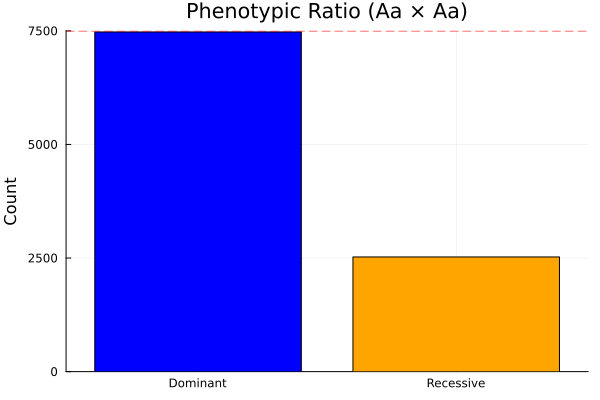

In [8]:
# Visualize Mendelian ratios
phenos = [phenotype(o) for o in f2_generation]
pheno_counts = countmap(phenos)

# Create visualization
bar(["Dominant", "Recessive"], 
    [pheno_counts["Dominant"], pheno_counts["Recessive"]],
    title="Phenotypic Ratio (Aa × Aa)",
    ylabel="Count",
    color=[:blue, :orange],
    legend=false)

# Add expected 3:1 ratio line
hline!([7500], label="Expected 3:1", linestyle=:dash, color=:red)

## Modern Applications

### Genetic Testing and Medicine

- **Pharmacogenomics**: Tailoring drugs to genetic profiles
- **Gene therapy**: Correcting genetic defects (first success: 1990)
- **CRISPR-Cas9**: Precise gene editing (Nobel Prize 2020)



In [9]:
# Simulate genetic disease inheritance (recessive)
function disease_risk(parent1::Genotype, parent2::Genotype)
    offspring = cross(parent1, parent2, 10000)
    
    affected = count(o -> o.allele1 == 'a' && o.allele2 == 'a', offspring)
    carriers = count(o -> ('A' in [o.allele1, o.allele2]) && 
                          ('a' in [o.allele1, o.allele2]), offspring)
    unaffected = count(o -> o.allele1 == 'A' && o.allele2 == 'A', offspring)
    
    println("Disease Risk Analysis (10000 simulations):")
    println("  Affected (aa): $(round(100affected/10000, digits=1))%")
    println("  Carriers (Aa): $(round(100carriers/10000, digits=1))%")
    println("  Unaffected (AA): $(round(100unaffected/10000, digits=1))%")
end

# Both parents are carriers
carrier1 = Genotype('A', 'a')
carrier2 = Genotype('A', 'a')
disease_risk(carrier1, carrier2)

Disease Risk Analysis (10000 simulations):


  Affected (aa): 25.6%
  Carriers (Aa): 49.9%
  Unaffected (AA): 24.6%


## Summary and Future Directions

### Key Concepts Introduced

- DNA structure and base pairing rules
- Central dogma: DNA → RNA → Protein
- Mendelian inheritance patterns
- Computational genetics with Julia

### Modern Frontiers

- **Epigenetics**: Heritable changes beyond DNA sequence
- **Synthetic biology**: Engineering new biological systems
- **Personalized medicine**: Treatment based on individual genomes
- **Population genetics**: Evolution and genetic diversity

### Resources

- NCBI GenBank: Public DNA sequence database
- 1000 Genomes Project: Human genetic variation
- CoCalc: Collaborative computational biology platform

